In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import shap
import joblib
import datetime
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

directory = '/content/drive/MyDrive/Thesis'
data_dir = directory + "/Data"
models_dir = directory + "/models"

# SHAP

In [3]:
SCALER_DATETIME_FEATURES = [
    'started_at_year',
    'started_at_month',
    'started_at_day',
    'started_at_hour',
    'started_at_week',
    'started_at_quarter',
    'started_at_dayofweek',
]

SCALER_WEATHER_FEATURES = [
    "temp",
    "dwpt",
    "rhum",
    "prcp",
    "wdir",
    "wspd",
    "pres",
    "coco",
    "temp_lag_1_h",
    "temp_lag_2_h",
    "temp_lag_24_h",
    "prcp_lag_1_h",
    "prcp_lag_2_h",
    "prcp_lag_24_h",
    "rhum_lag_1_h",
    "rhum_lag_2_h",
    "rhum_lag_24_h",
    "wspd_lag_1_h",
    "wspd_lag_2_h",
    "wspd_lag_24_h",
    "coco_lag_1_h",
    "coco_lag_2_h",
    "coco_lag_24_h"
]


SCALER_DEMAND_FEATURES = [
    "demand_lag_1_h",
    "demand_lag_2_h",
    "demand_lag_24_h",
    "mean_gnn_cluster_demand_1h",
    "total_gnn_cluster_demand_1h",
    "total_demand_1h",
    "demand_degrees_1h"
]

removed_cols = ['Unnamed: 0', 'actual_demand', 'pred', 'started_at_year', 'coco_lag_1_h', 'coco_lag_2_h', 'coco_lag_24_h']
target_scaler = joblib.load(f'{models_dir}/target_scaler.sav')
label_encoder = joblib.load(f'{models_dir}/start_station_encoder.sav')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
def get_explainability_unscaled(suf):
  model_preds = pd.read_csv(f"{models_dir}/test_predictions{suf}.csv")

  datetime_scaler = joblib.load(f'{models_dir}/datetime_features_scaler.sav')
  demand_scaler = joblib.load(f'{models_dir}/demand_features_scaler.sav')
  weather_scaler = joblib.load(f'{models_dir}/weather_scaler.sav')
  model_preds['started_at_year'] = 2024
  model_preds['start_station_cluster'] = label_encoder.inverse_transform(model_preds['start_station_cluster'])
  model_preds['coco_lag_1_h'] =  1
  model_preds['coco_lag_2_h'] =  1
  model_preds['coco_lag_24_h'] = 1

  model_preds[SCALER_DATETIME_FEATURES] = pd.DataFrame(datetime_scaler.inverse_transform(model_preds[SCALER_DATETIME_FEATURES]), columns=SCALER_DATETIME_FEATURES)
  model_preds[SCALER_DEMAND_FEATURES] = pd.DataFrame(demand_scaler.inverse_transform(model_preds[SCALER_DEMAND_FEATURES]), columns=SCALER_DEMAND_FEATURES)
  model_preds[SCALER_WEATHER_FEATURES] = pd.DataFrame(weather_scaler.inverse_transform(model_preds[SCALER_WEATHER_FEATURES]), columns=SCALER_WEATHER_FEATURES)
  filename = f'{models_dir}/demand_model{suf}.sav'
  model = joblib.load(filename)
  X = model_preds.drop(columns=removed_cols)
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)

  shap.summary_plot(shap_values, X, max_display=15)
  #shap.force_plot(explainer.expected_value, shap_values, X)

  return model, model_preds, explainer, shap_values

In [5]:
def get_explainability(suf):
  model_preds = pd.read_csv(f"{models_dir}/test_predictions{suf}.csv")
  label_encoder = joblib.load(f'{models_dir}/start_station_encoder.sav')
  model_preds['started_at_year'] = 2024
  #model_preds['start_station_cluster'] = label_encoder.inverse_transform(model_preds['start_station_cluster'])
  model_preds['coco_lag_1_h'] =  1
  model_preds['coco_lag_2_h'] =  1
  model_preds['coco_lag_24_h'] = 1
  filename = f'{models_dir}/demand_model{suf}.sav'
  model = joblib.load(filename)
  X = model_preds.drop(columns=removed_cols)
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)

  shap.summary_plot(shap_values, X, max_display=15)
  #shap.force_plot(explainer.expected_value, shap_values, X)

  return model, model_preds, explainer, shap_values

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


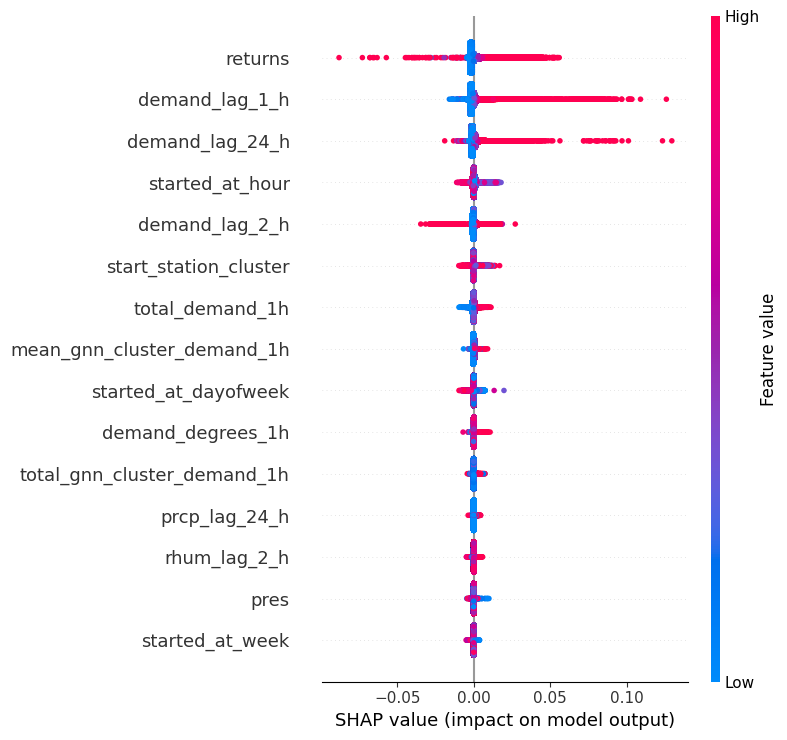

In [6]:
suf = "_o_xgb_01_11"
model_o, X_o, explainer_o, shap_values_o = get_explainability(suf)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


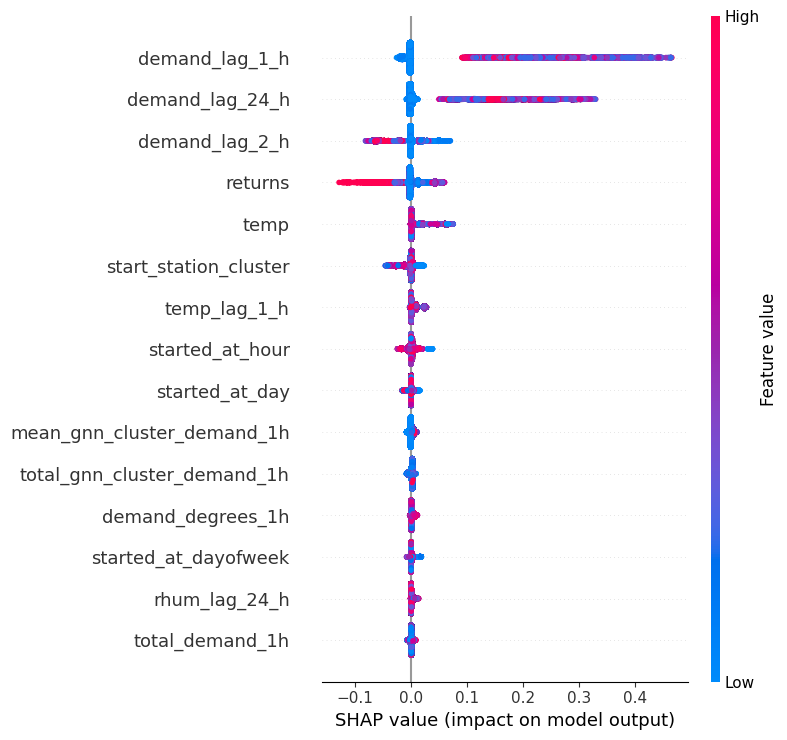

In [7]:
model_o_u, X_o_u, explainer_o_u, shap_values_o_u = get_explainability_unscaled(suf)

In [8]:
y_pred = X_o["pred"]
bins = [-np.inf, 2, 5, np.inf]
labels = ["Demand < 2", "2 ≤ Demand < 5", "Demand ≥ 5"]
y_classes = pd.cut(y_pred, bins=bins, labels=labels)

In [9]:
import matplotlib.pyplot as plt

<ipython-input-10-21fe9bd41300>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_shap_values = shap_df.groupby('Class').apply(lambda x: x.iloc[:, :-1].abs().mean()).T
<ipython-input-10-21fe9bd41300>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean_shap_values = shap_df.groupby('Class').apply(lambda x: x.iloc[:, :-1].abs().mean()).T


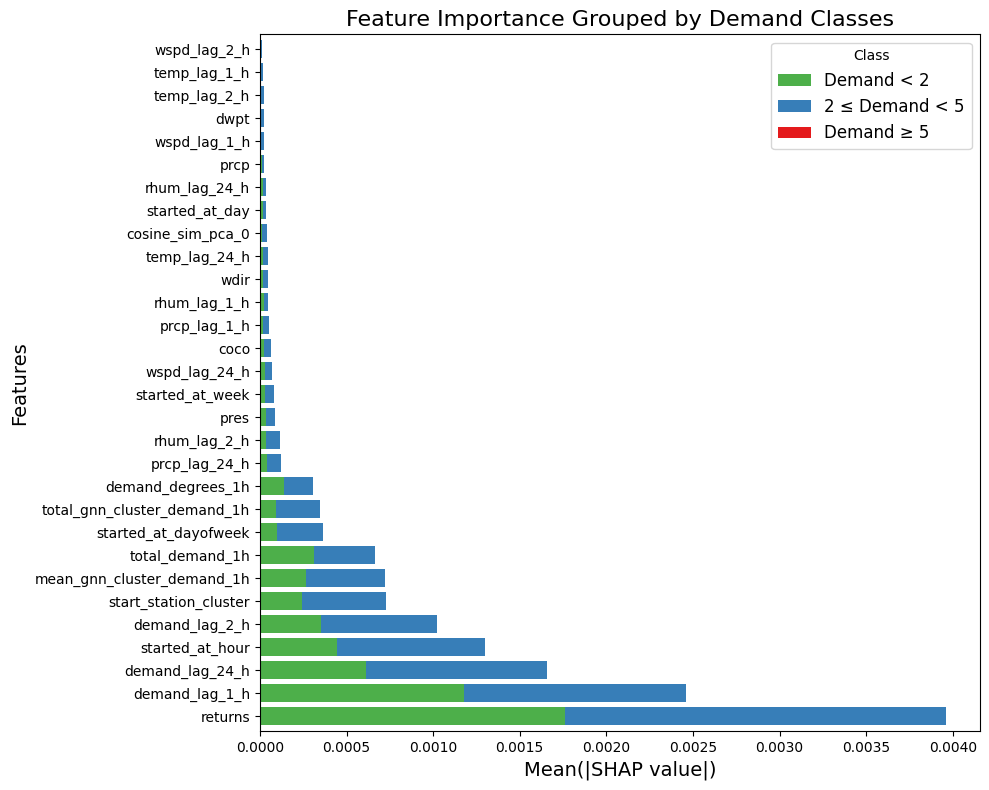

In [10]:
# Prepare DataFrame with SHAP values and class labels
shap_df = pd.DataFrame(shap_values_o, columns=X_o.drop(columns=removed_cols).columns)
shap_df['Class'] = y_classes
shap_df = shap_df[shap_df['Class'] != 'Demand ≥ 5']
# Calculate mean absolute SHAP values for each feature per class
mean_shap_values = shap_df.groupby('Class').apply(lambda x: x.iloc[:, :-1].abs().mean()).T
mean_shap_values.columns = labels

# Sort features by total mean SHAP value across all classes (optional)
mean_shap_values['Total'] = mean_shap_values.sum(axis=1)
mean_shap_values = mean_shap_values.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
mean_shap_values[0:30].plot(kind='barh', stacked=True, ax=ax, width=0.8, color=['#4daf4a', '#377eb8', '#e41a1c'])

# Customize the plot
plt.title('Feature Importance Grouped by Demand Classes', fontsize=16)
plt.xlabel('Mean(|SHAP value|)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.legend(title="Class", fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
mean_shap_values.sort_values("Demand ≥ 5", ascending=False)

Demand < 2  2 ≤ Demand < 5  Demand ≥ 5
returns                        0.001761        0.002198         NaN
demand_lag_1_h                 0.001181        0.001281         NaN
demand_lag_24_h                0.000611        0.001044         NaN
started_at_hour                0.000444        0.000855         NaN
demand_lag_2_h                 0.000352        0.000670         NaN
start_station_cluster          0.000242        0.000486         NaN
mean_gnn_cluster_demand_1h     0.000269        0.000455         NaN
total_demand_1h                0.000314        0.000349         NaN
started_at_dayofweek           0.000100        0.000261         NaN
total_gnn_cluster_demand_1h    0.000095        0.000253         NaN
demand_degrees_1h              0.000140        0.000168         NaN
prcp_lag_24_h                  0.000040        0.000083         NaN
rhum_lag_2_h                   0.000035        0.000083         NaN
pres                           0.000034        0.000055         NaN
started_at_week                0.000028        0.000056         NaN
wspd_lag_24_h                  0.000032        0.000036         NaN
coco                           0.000024        0.000042         NaN
prcp_lag_1_h                   0.000016        0.000035         NaN
rhum_lag_1_h                   0.000023        0.000025         NaN
wdir                           0.000020        0.000026         NaN
temp_lag_24_h                  0.000016        0.000030         NaN
cosine_sim_pca_0               0.000013        0.000026         NaN
started_at_day                 0.000016        0.000022         NaN
rhum_lag_24_h                  0.000015        0.000019         NaN
prcp                           0.000010        0.000012         NaN
wspd_lag_1_h                   0.000008        0.000014         NaN
dwpt                           0.000005        0.000016         NaN
temp_lag_2_h                   0.000007        0.000014         NaN
temp_lag_1_h                   0.000006        0.000014         NaN
wspd_lag_2_h                   0.000004        0.000010         NaN
temp                           0.000005        0.000008         NaN
rhum                           0.000004        0.000007         NaN
wspd                           0.000003        0.000006         NaN
is_holiday                     0.000004        0.000005         NaN
started_at_month               0.000003        0.000005         NaN
prcp_lag_2_h                   0.000004        0.000004         NaN
started_at_quarter             0.000000        0.000000         NaN

In [12]:
#X_o['start_station_cluster'].value_counts()

In [13]:
X_o['start_station_cluster'].value_counts()

start_station_cluster
82     1820
114    1820
107    1820
108    1820
109    1820
110    1820
111    1820
112    1820
113    1820
115    1820
105    1820
116    1820
117    1820
118    1820
120    1820
121    1820
122    1820
123    1820
106    1820
103    1820
80     1820
90     1820
83     1820
84     1820
85     1820
86     1820
87     1820
88     1820
89     1820
91     1820
102    1820
92     1820
94     1820
95     1820
97     1820
98     1820
99     1820
101    1820
124    1820
125    1820
126    1820
155    1820
148    1820
149    1820
150    1820
151    1820
152    1820
153    1820
154    1820
156    1820
127    1820
157    1820
158    1820
159    1820
160    1820
161    1820
162    1820
163    1820
147    1820
146    1820
145    1820
144    1820
128    1820
129    1820
130    1820
131    1820
132    1820
133    1820
135    1820
136    1820
137    1820
138    1820
139    1820
140    1820
141    1820
142    1820
143    1820
81     1820
164    1820
79     1820
42     1820
57     1820
53     1820
52     1820
50     1820
48     1820
46     1820
45     1820
44     1820
43     1820
78     1820
60     1820
39     1820
38     1820
35     1820
34     1820
33     1820
27     1820
25     1820
19     1820
3      1820
59     1820
41     1820
77     1820
65     1820
71     1820
74     1820
69     1820
68     1820
67     1820
66     1820
61     1820
73     1820
72     1820
64     1820
75     1820
63     1820
76     1820
62     1820
26     1800
54     1800
134    1800
55     1800
22     1800
37     1800
11     1800
28     1800
24     1780
30     1780
4      1780
70     1760
100    1760
56     1740
7      1740
6      1720
51     1720
58     1680
18     1640
15     1620
96     1620
29     1620
104    1600
36     1580
8      1580
40     1580
12     1560
9      1540
17     1520
14     1500
23     1480
2      1420
16     1360
32     1240
13     1220
5      1120
31     1060
47     1060
93     1040
20     1020
1      1000
21      680
10      660
0       520
Name: count, dtype: int64

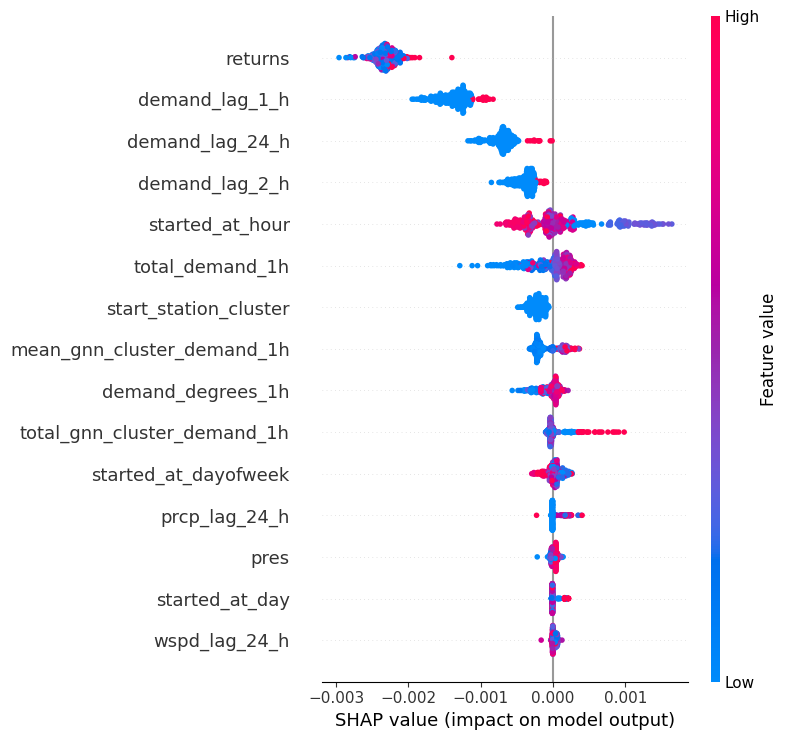

In [14]:
indexes = X_o['start_station_cluster'] == 0

X = X_o.loc[indexes]
shap_values = shap_values_o[X.index]
shap.summary_plot(shap_values, X.drop(columns=removed_cols), max_display=15)

In [15]:
explainer_o(X.iloc[0:50].drop(columns=removed_cols))

.values =
array([[-1.09183420e-04,  1.00214356e-05, -1.01299729e-05, ...,
        -2.82357709e-04, -2.30008946e-03,  1.73970955e-06],
       [-7.97247631e-05,  9.76249885e-06, -1.01363703e-05, ...,
        -2.37564484e-04, -2.22998462e-03,  1.49868765e-06],
       [-1.57166054e-04,  1.01226933e-05, -1.00528514e-05, ...,
        -2.19533453e-04, -2.40666466e-03,  3.86685588e-06],
       ...,
       [-2.16914399e-04,  2.22081007e-06, -1.24671615e-05, ...,
        -1.63634843e-06, -2.25957716e-03,  7.62183799e-06],
       [-2.07852674e-04,  5.46808587e-06, -1.30454346e-05, ...,
         1.47383230e-06, -2.40990217e-03,  9.12128598e-06],
       [-2.18038564e-04,  2.17260526e-06, -1.12493190e-05, ...,
         1.08099402e-05, -2.34563067e-03,  8.95386802e-06]], dtype=float32)

.base_values =
array([1.0051429, 1.0051429, 1.0051429, 1.0051429, 1.0051429, 1.0051429,
       1.0051429, 1.0051429, 1.0051429, 1.0051429, 1.0051429, 1.0051429,
       1.0051429, 1.0051429, 1.0051429, 1.0051429, 1.005

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[1.03198957]]
11.356298923492432
9.0


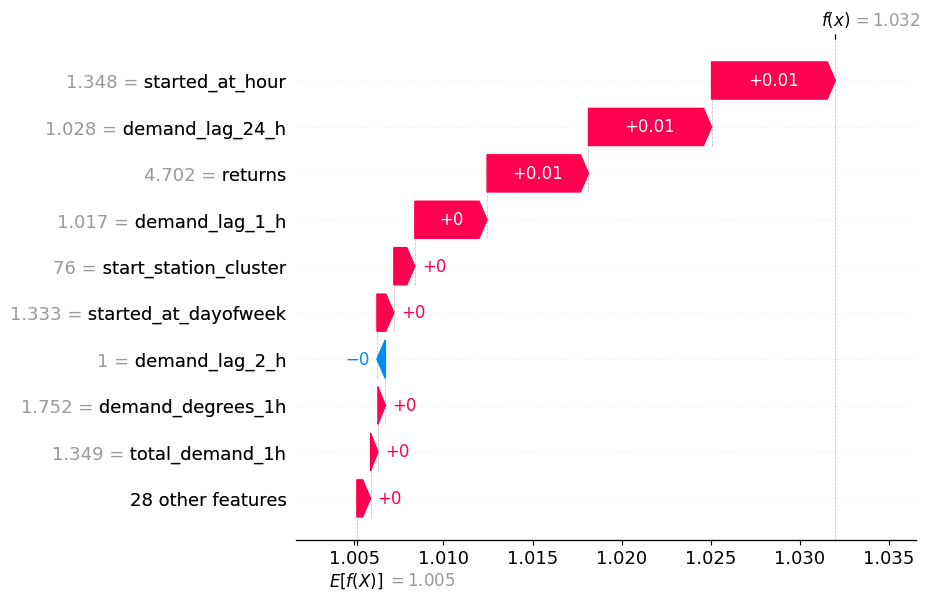

In [16]:
index = 3
indexes = X_o['start_station_cluster'] == label_encoder.transform([158])[0]
X = X_o.loc[indexes]
X = X[X['actual_demand'] == 9]
print(target_scaler.transform([[X.iloc[index]['pred']]]))
print(X.iloc[index]['pred'])
print(X.iloc[index]['actual_demand'])

explained = explainer_o(X.iloc[0:50].drop(columns=removed_cols))
shap.plots.waterfall(explained[index])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[1.0125345]]
4.449747204780579


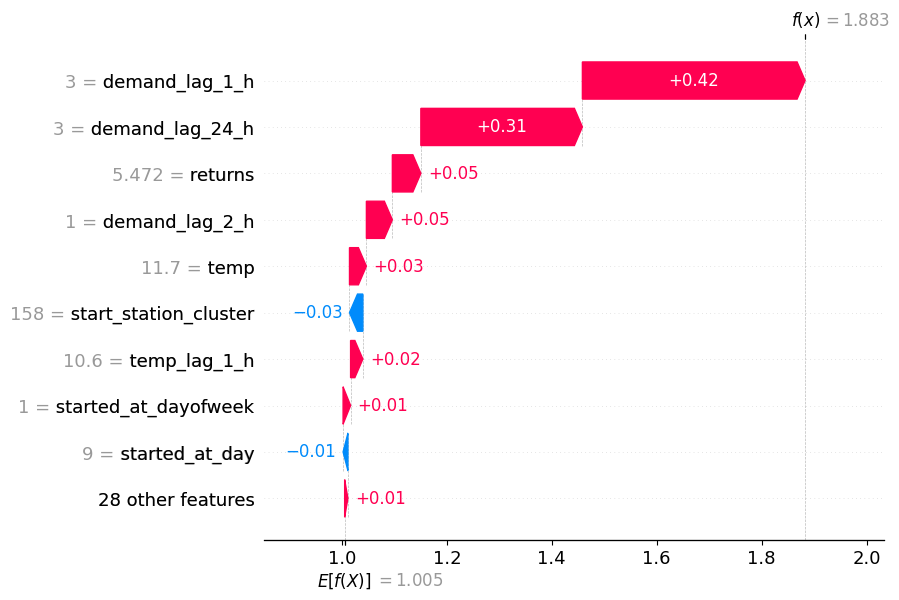

In [17]:
indexes = X_o_u['start_station_cluster'] == 158

X = X_o_u.loc[indexes]
X = X[X['actual_demand'] == 7.0]
print(target_scaler.transform([[X.iloc[index]['pred']]]))
print(X.iloc[index]['pred'])

explained = explainer_o_u(X.iloc[0:50].drop(columns=removed_cols))
shap.plots.waterfall(explained[index])

# Feature Importance

<Axes: >

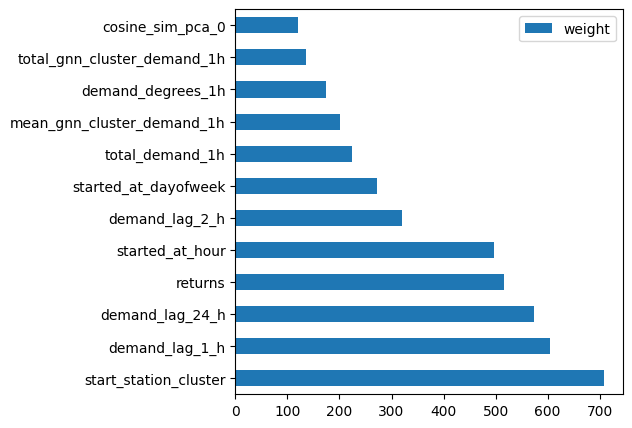

In [18]:
feature_important = model_o.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_weight = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=True)
data_weight = data_weight.rename(columns={"score": "weight"})
data_weight.loc[[i for i in data_weight.index  if "dim_var" not in i]].nlargest(12, columns="weight").plot(kind='barh', figsize = (5, 5)) ## plot top 40 features


<Axes: >

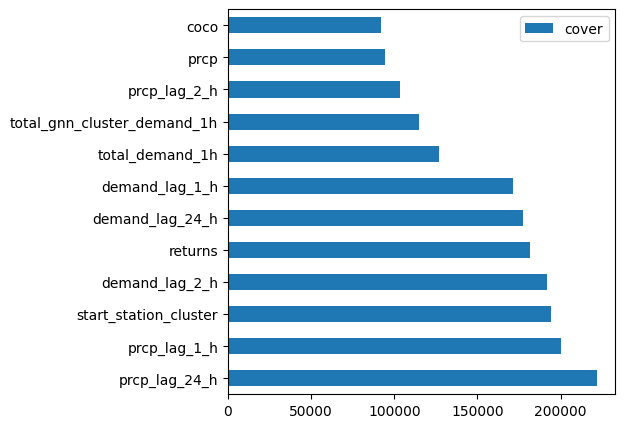

In [19]:
feature_important = model_o.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_cover = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=True)
data_cover = data_cover.rename(columns={"score": "cover"})
data_cover.loc[[i for i in data_cover.index  if "dim_var" not in i]].nlargest(12, columns="cover").plot(kind='barh', figsize = (5, 5)) ## plot top 40 features

<Axes: >

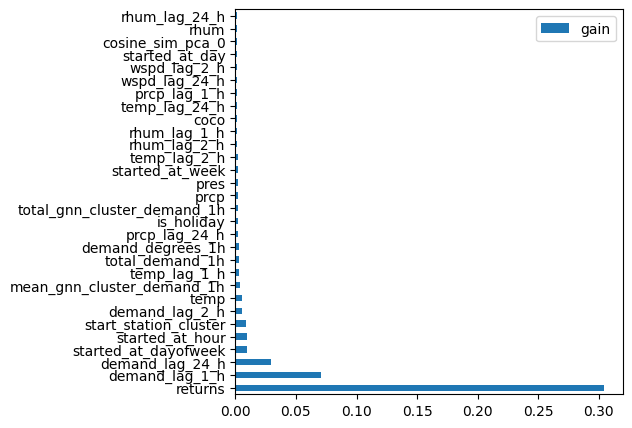

In [20]:
feature_important = model_o.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_gain = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=True)
data_gain = data_gain.rename(columns={"score": "gain"})
data_gain.loc[[i for i in data_gain.index  if "dim_var" not in i]].nlargest(30, columns="gain").plot(kind='barh', figsize = (5, 5)) ## plot top 40 features

In [21]:
feature_importance = pd.concat([data_gain.sort_index().rename(columns={"score": "gain"}), data_cover.sort_index().rename(columns={"score": "cover"}), data_weight.sort_index().rename(columns={"score": "weight"})], axis=1)

In [22]:
feature_importance['gain_rank'] = feature_importance['gain'].rank(method='max', ascending=False)
feature_importance['cover_rank'] = feature_importance['cover'].rank(method='max', ascending=False)

In [23]:
feature_importance.shape

(36, 5)

In [24]:
36/3

12.0

# Gain

2 out of the highest 12 features are out of the top 12 features in regards to weight vs gain. 1 feature is in the next top 12, another is in the lowest.

7 out of the next highest 12 features are out of the top 12 features in regards to weight vs gain. 1 feature is in the top 12, 6 in the lowest.

6 out of the lowest 12 features are out of the top 12 features in regards to weight vs gain. All of them are at the middle


# Cover
5 out of the highest 12 features are out of the top 12 features in regards to weight vs cover.

7 out of the next highest 12 features are out of the top 12 features in regards to weight vs cover.

6 out of the lowest 12 features are out of the top 12 features in regards to weight vs cover.

In [25]:
feature_importance.sort_values("gain_rank").reset_index()

index      gain          cover  weight  gain_rank  cover_rank
0                       returns  0.304609  181896.234375   517.0        1.0         5.0
1                demand_lag_1_h  0.070609  171275.296875   604.0        2.0         7.0
2               demand_lag_24_h  0.029778  177400.281250   574.0        3.0         6.0
3          started_at_dayofweek  0.009996   32188.478516   272.0        4.0        24.0
4               started_at_hour  0.009791   86865.421875   497.0        5.0        14.0
5         start_station_cluster  0.008891  194205.406250   709.0        6.0         3.0
6                demand_lag_2_h  0.005465  191906.343750   321.0        7.0         4.0
7                          temp  0.005262   15755.666992    87.0        8.0        30.0
8    mean_gnn_cluster_demand_1h  0.004135   83523.296875   201.0        9.0        15.0
9                  temp_lag_1_h  0.003156   67532.281250    53.0       10.0        16.0
10              total_demand_1h  0.002843  126692.312500   225.0       11.0         8.0
11            demand_degrees_1h  0.002629   88318.492188   174.0       12.0        13.0
12                prcp_lag_24_h  0.002282  221915.265625    26.0       13.0         1.0
13                   is_holiday  0.002135   25821.785156    14.0       14.0        27.0
14  total_gnn_cluster_demand_1h  0.001910  114858.125000   136.0       15.0         9.0
15                         prcp  0.001885   94666.156250    13.0       16.0        11.0
16                         pres  0.001873   35893.769531   113.0       17.0        23.0
17              started_at_week  0.001847   59992.039062    76.0       18.0        18.0
18                 temp_lag_2_h  0.001835   47126.937500    49.0       19.0        19.0
19                 rhum_lag_2_h  0.001675   36478.589844    71.0       20.0        22.0
20                 rhum_lag_1_h  0.001670   30022.101562    69.0       21.0        26.0
21                         coco  0.001666   92021.312500    35.0       22.0        12.0
22                temp_lag_24_h  0.001662   46281.949219    78.0       23.0        20.0
23                 prcp_lag_1_h  0.001603  200197.437500    16.0       24.0         2.0
24                wspd_lag_24_h  0.001579    2464.126953    63.0       25.0        33.0
25                 wspd_lag_2_h  0.001508   13142.381836    55.0       26.0        31.0
26               started_at_day  0.001496   21652.898438   109.0       27.0        28.0
27             cosine_sim_pca_0  0.001488   61743.546875   121.0       28.0        17.0
28                         rhum  0.001473    1342.719482    82.0       29.0        35.0
29                rhum_lag_24_h  0.001444   16753.904297    83.0       30.0        29.0
30                         wdir  0.001389   37769.488281    82.0       31.0        21.0
31                         wspd  0.001356    1425.171875    64.0       32.0        34.0
32                 prcp_lag_2_h  0.001292  103563.234375    13.0       33.0        10.0
33                         dwpt  0.001290   30888.720703    75.0       34.0        25.0
34                 wspd_lag_1_h  0.001173    5409.327637    61.0       35.0        32.0
35             started_at_month  0.000899     561.580627    62.0       36.0        36.0

# RMSE By Cluster

In [26]:
def get_combined_df(suf):
  model_preds_best = pd.read_csv(f"{models_dir}/test_predictions{suf}_best.csv")
  model_preds_worst = pd.read_csv(f"{models_dir}/test_predictions{suf}_worst.csv")

  df = pd.concat([model_preds_best, model_preds_worst])
  return df

  # filename = f'{models_dir}/demand_model{suf}.sav'
  # model = joblib.load(filename)
  # X = model_preds.drop(columns=['Unnamed: 0', 'actual_demand', 'pred'])
  # explainer = shap.TreeExplainer(model)
  # shap_values = explainer.shap_values(X)

  # shap.summary_plot(shap_values, X)
  # #shap.force_plot(explainer.expected_value, shap_values, X)

  # return model, model_preds, explainer, shap_values

In [27]:
X_o_combined = get_combined_df("_o_xgb_01_11")

In [28]:


label_encoder = joblib.load(f'{models_dir}/start_station_encoder.sav')
datetime_scaler = joblib.load(f'{models_dir}/datetime_features_scaler.sav')
def get_all_results(X):
  all_results_df = pd.DataFrame()

  data = X.copy()
  data['start_station_cluster_original'] = label_encoder.inverse_transform(data['start_station_cluster'])

  for cluster in data['start_station_cluster_original'].unique():
    indexes = data['start_station_cluster_original'] == cluster
    X = data.loc[indexes]
    X_non_zero = data.loc[indexes & (data['actual_demand'] != 0)]
    X_zero = data.loc[indexes & (data['actual_demand'] == 0)]

    X_under_predicting = data.loc[indexes & (data['actual_demand'] > data['pred'])]
    X_over_predicting = data.loc[indexes & (data['actual_demand'] < data['pred'])]

    results = pd.DataFrame(data={
        "cluster_original": [cluster],
        "cluster": [X.iloc[0]['start_station_cluster']],
        "MAPE": [mean_absolute_percentage_error(X['actual_demand']+1, X['pred']+1)],
        "MSE": [mean_squared_error(X['actual_demand'], X['pred'])],
        "RMSE": [np.sqrt(mean_squared_error(X['actual_demand'], X['pred']))],

        "under_predicting_MAPE": [mean_absolute_percentage_error(X_under_predicting['actual_demand']+1, X_under_predicting['pred']+1)],
        "under_predicting_MSE": [mean_squared_error(X_under_predicting['actual_demand'], X_under_predicting['pred'])],
        "under_predicting_RMSE": [np.sqrt(mean_squared_error(X_under_predicting['actual_demand'], X_under_predicting['pred']))],

        "over_predicting_MAPE": [mean_absolute_percentage_error(X_over_predicting['actual_demand']+1, X_over_predicting['pred']+1)],
        "over_predicting_MSE": [mean_squared_error(X_over_predicting['actual_demand'], X_over_predicting['pred'])],
        "over_predicting_RMSE": [np.sqrt(mean_squared_error(X_over_predicting['actual_demand'], X_over_predicting['pred']))],

        "non_zero_MAPE": [mean_absolute_percentage_error(X_non_zero['actual_demand']+1, X_non_zero['pred']+1)],
        "non_zero_MSE": [mean_squared_error(X_non_zero['actual_demand'], X_non_zero['pred'])],
        "non_zero_RMSE": [np.sqrt(mean_squared_error(X_non_zero['actual_demand'], X_non_zero['pred']))],

        "zero_MAPE": [mean_absolute_percentage_error(X_zero['actual_demand']+1, X_zero['pred']+1)],
        "zero_MSE": [mean_squared_error(X_zero['actual_demand'], X_zero['pred'])],
        "zero_RMSE": [np.sqrt(mean_squared_error(X_zero['actual_demand'], X_zero['pred']))],

        "max_demand": [X['actual_demand'].max()],
        "min_demand": [X['actual_demand'].min()],
        "mean_demand": [X['actual_demand'].mean()],
        "median_demand": [X['actual_demand'].median()]
    })
    all_results_df = pd.concat([all_results_df, results])
  return all_results_df, data

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
combined_all_results_df, data_combined = get_all_results(X_o_combined)
all_results_df, data = get_all_results(X_o)

In [30]:
SCALER_DATETIME_FEATURES = [
    'started_at_year',
    'started_at_month',
    'started_at_day',
    'started_at_hour',
    'started_at_week',
    'started_at_quarter',
    'started_at_dayofweek',
]


In [31]:
data_combined['started_at_year'] = 2024
data_combined['started_at_quarter'] = 1
data_combined[SCALER_DATETIME_FEATURES] = pd.DataFrame(datetime_scaler.inverse_transform(data_combined[SCALER_DATETIME_FEATURES]), columns=SCALER_DATETIME_FEATURES)
data_combined['started_at_year'] = 2024

In [32]:
data['started_at_year'] = 2024
data['started_at_quarter'] = 1
data[SCALER_DATETIME_FEATURES] = pd.DataFrame(datetime_scaler.inverse_transform(data[SCALER_DATETIME_FEATURES]), columns=SCALER_DATETIME_FEATURES)
data['started_at_year'] = 2024

In [33]:
def get_rmses(X):


  print("Overall MSE: ", (mean_squared_error(X['actual_demand'], X['pred'])))

  under_predicting = X[(X['actual_demand'] > X['pred'])]
  print("under-predicting MSE:", (mean_squared_error(under_predicting['actual_demand'], under_predicting['pred'])))

  over_predicting = X[(X['actual_demand'] < X['pred'])]
  print("over-predicting MSE:", (mean_squared_error(over_predicting['actual_demand'], over_predicting['pred'])))

  non_zeros = X[(X['actual_demand'] != 0)]
  print("Non-Zero MSE:", (mean_squared_error(non_zeros['actual_demand'], non_zeros['pred'])))

  zeros = X[(X['actual_demand'] == 0)]
  print("Zero MSE:", (mean_squared_error(zeros['actual_demand'], zeros['pred'])))
  print()

  print("Overall RMSE: ", np.sqrt(mean_squared_error(X['actual_demand'], X['pred'])))

  under_predicting = X[(X['actual_demand'] > X['pred'])]
  print("under-predicting RMSE:", np.sqrt(mean_squared_error(under_predicting['actual_demand'], under_predicting['pred'])))

  over_predicting = X[(X['actual_demand'] < X['pred'])]
  print("over-predicting RMSE:", np.sqrt(mean_squared_error(over_predicting['actual_demand'], over_predicting['pred'])))

  non_zeros = X[(X['actual_demand'] != 0)]
  print("Non-Zero RMSE:", np.sqrt(mean_squared_error(non_zeros['actual_demand'], non_zeros['pred'])))

  zeros = X[(X['actual_demand'] == 0)]
  print("Zero RMSE:", np.sqrt(mean_squared_error(zeros['actual_demand'], zeros['pred'])))
  print()

  print("Overall MAE: ", (mean_absolute_error(X['actual_demand'], X['pred'])))

  under_predicting = X[(X['actual_demand'] > X['pred'])]
  print("under-predicting MAE:", (mean_absolute_error(under_predicting['actual_demand'], under_predicting['pred'])))

  over_predicting = X[(X['actual_demand'] < X['pred'])]
  print("over-predicting MAE:", (mean_absolute_error(over_predicting['actual_demand'], over_predicting['pred'])))

  non_zeros = X[(X['actual_demand'] != 0)]
  print("Non-Zero MAE:", (mean_absolute_error(non_zeros['actual_demand'], non_zeros['pred'])))

  zeros = X[(X['actual_demand'] == 0)]
  print("Zero MAE:", (mean_absolute_error(zeros['actual_demand'], zeros['pred'])))
  print()

  print("Overall MAPE: ", (mean_absolute_percentage_error(X['actual_demand']+1, X['pred']+1)))

  under_predicting = X[(X['actual_demand'] > X['pred'])]
  print("under-predicting MAPE:", (mean_absolute_percentage_error(under_predicting['actual_demand']+1, under_predicting['pred']+1)))

  over_predicting = X[(X['actual_demand'] < X['pred'])]
  print("over-predicting MAPE:", (mean_absolute_percentage_error(over_predicting['actual_demand']+1, over_predicting['pred']+1)))

  non_zeros = X[(X['actual_demand'] != 0)]
  print("Non-Zero MAPE:", (mean_absolute_percentage_error(non_zeros['actual_demand']+1, non_zeros['pred']+1)))

  zeros = X[(X['actual_demand'] == 0)]
  print("Zero MAPE:", (mean_absolute_percentage_error(zeros['actual_demand']+1, zeros['pred']+1)))




In [34]:
get_rmses(X_o)

Overall MSE:  3.4781439953315743
under-predicting MSE: 6.971971221150563
over-predicting MSE: 1.7610094600054191
Non-Zero MSE: 7.081684897418648
Zero MSE: 0.5317752005001515

Overall RMSE:  1.864978282804273
under-predicting RMSE: 2.6404490567232237
over-predicting RMSE: 1.327030316159137
Non-Zero RMSE: 2.661143531908538
Zero RMSE: 0.7292291824249435

Overall MAE:  0.9930974108872644
under-predicting MAE: 1.5508852318428243
over-predicting MAE: 0.7190063014737218
Non-Zero MAE: 1.6827883969567792
Zero MAE: 0.42918428914226003

Overall MAPE:  0.39507594954338343
under-predicting MAPE: 0.2762948438939867
over-predicting MAPE: 0.4535110560674516
Non-Zero MAPE: 0.3533599236804838
Zero MAPE: 0.42918428914226003


In [35]:
get_rmses(X_o_combined)

Overall MSE:  3.288584870413703
under-predicting MSE: 6.8188926710314
over-predicting MSE: 1.5916577963187206
Non-Zero MSE: 6.714298484126988
Zero MSE: 0.4876132800459698

Overall RMSE:  1.8134455796669784
under-predicting RMSE: 2.611300953745355
over-predicting RMSE: 1.2616092090337327
Non-Zero RMSE: 2.59119634225718
Zero RMSE: 0.6982931190023068

Overall MAE:  0.9639312237526483
under-predicting MAE: 1.5574264766651216
over-predicting MAE: 0.6786599718434273
Non-Zero MAE: 1.6413959173592
Zero MAE: 0.4100147046737863

Overall MAPE:  0.3806286510521241
under-predicting MAPE: 0.2791291553191316
over-predicting MAPE: 0.429424294524515
Non-Zero MAPE: 0.34468819228730657
Zero MAPE: 0.4100147046737863


Overall RMSE:  1.818450601595066

under-predicting RMSE: 2.5948662711392454

over-predicting RMSE: 1.2863553185454326

Non-Zero RMSE: 2.5943250959516986

Zero RMSE: 0.7123119007062843

Overall RMSE:  1.864978282804273

under-predicting RMSE: 2.6404490567232237

over-predicting RMSE: 1.327030316159137

Non-Zero RMSE: 2.661143531908538

Zero RMSE: 0.7292291824249435

# Visualizations

In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [37]:
def add_datetime(df, column_name="started_at"):
    conversion_dict_hourly = dict(year= df[f'{column_name}_year'].astype(str),
                                  month=df[f'{column_name}_month'].astype(str),
                                  day=  df[f'{column_name}_day'].astype(str),
                                  hour= df[f'{column_name}_hour'].astype(str)
                                 )
    conversion_dict_daily = dict(year= df[f'{column_name}_year'].astype(str),
                           month=df[f'{column_name}_month'].astype(str),
                           day=  df[f'{column_name}_day'].astype(str)
                                 )
    df[f'{column_name}_hourly'] = pd.to_datetime(conversion_dict_hourly)

    df[f'{column_name}_daily'] = pd.to_datetime(conversion_dict_daily)

    return df

In [38]:
data = add_datetime(data)

In [39]:
data_combined = add_datetime(data_combined)

In [40]:
def pred_vs_demand(demand_hourly_overall, title,
                   time_col='started_at_hourly', start_date="2024-1-1", end_date="2024-1-10"):
    one_month = demand_hourly_overall[(demand_hourly_overall[time_col] > pd.to_datetime(start_date)) &
                                        (demand_hourly_overall[time_col] < pd.to_datetime(end_date))]

    sorted_df = one_month.sort_values(time_col)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=sorted_df[time_col],
                             y=sorted_df['Demand'],
                             mode='lines',
                             name='Demand'))

    sorted_df = one_month.sort_values(time_col)

    fig.add_trace(go.Scatter(x=sorted_df[time_col],
                             y=sorted_df['Prediction'],
                             mode='lines',
                             name='Prediction'))

    fig.update_layout(hovermode="x")

    fig.update_layout(title=f'{title}',
                       xaxis_title='Time'
                     )

    #fig.write_html(f"Plots/{title}.html")
    return fig

In [41]:
filtering_cluster = all_results_df[all_results_df["non_zero_RMSE"] > 3]['cluster']

X = X_o.loc[X_o['start_station_cluster'].isin(filtering_cluster)]

print("Worst RMSE: ", np.sqrt(mean_squared_error(X['actual_demand'], X ['pred'])))

Worst RMSE:  4.054636763284985


In [42]:
filtering_cluster.values

array([ 35.,  42.,  53.,  62.,  65.,  69.,  71.,  79.,  81.,  86.,  88.,
        91.,  94.,  99., 102., 105., 122., 145., 154.])

In [43]:
shap_values.shape

(520, 37)

In [44]:
X.drop(columns=['Unnamed: 0', 'actual_demand', 'pred'])

start_station_cluster  started_at_month  started_at_day  started_at_hour  started_at_week  started_at_quarter  started_at_dayofweek  is_holiday      temp      dwpt      rhum  prcp      wdir      wspd      pres      coco  demand_lag_1_h  demand_lag_2_h  demand_lag_24_h  temp_lag_1_h  temp_lag_2_h  temp_lag_24_h  prcp_lag_1_h  prcp_lag_2_h  prcp_lag_24_h  rhum_lag_1_h  rhum_lag_2_h  rhum_lag_24_h  wspd_lag_1_h  wspd_lag_2_h  wspd_lag_24_h  mean_gnn_cluster_demand_1h  total_gnn_cluster_demand_1h  total_demand_1h  demand_degrees_1h   returns  cosine_sim_pca_0  started_at_year  coco_lag_1_h  coco_lag_2_h  coco_lag_24_h
52280                      35          1.000000             1.0         1.000000         1.000000                 1.0                   1.0           1  1.338983  1.644599  1.764706   1.0  1.055556  1.095477  1.704545  1.176471        1.022535        1.011268         1.002817      1.423780      1.405488       1.457317      1.014286      1.000000            1.0          1.74          1.77           1.75      1.095477      1.067839       1.257538                    1.054772                     1.047619         1.195423              1.560  0.652176               0.0             2024             1             1              1
52281                      35          1.000000             1.0         1.043478         1.000000                 1.0                   1.0           1  1.359322  1.623693  1.694118   1.0  1.027778  1.095477  1.697727  1.176471        1.033803        1.022535         1.011268      1.405488      1.423780       1.423780      1.000000      1.014286            1.0          1.80          1.74           1.77      1.095477      1.095477       1.231156                    1.120088                     1.118326         1.287852              1.544  0.897161               0.0             2024             1             1              1
52282                      35          1.000000             1.0         1.260870         1.000000                 1.0                   1.0           1  1.284746  1.609756  1.800000   1.0  1.000000  1.000000  1.725000  1.117647        1.000000        1.005634         1.000000      1.338415      1.356707       1.390244      1.000000      1.000000            1.0          1.83          1.80           1.80      1.067839      1.067839       1.000000                    1.024896                     1.001443         1.019366              1.136  0.947548               0.0             2024             1             1              1
52283                      35          1.000000             1.0         1.304348         1.000000                 1.0                   1.0           1  1.264407  1.606272  1.835294   1.0  1.000000  1.000000  1.731818  1.117647        1.000000        1.000000         1.005634      1.356707      1.338415       1.356707      1.000000      1.000000            1.0          1.83          1.83           1.83      1.000000      1.067839       1.095477                    1.002455                     1.020202         1.017606              1.136  0.998246               0.0             2024             1             1              1
52284                      35          1.000000             1.0         1.347826         1.000000                 1.0                   1.0           1  1.247458  1.592334  1.835294   1.0  1.555556  1.067839  1.736364  1.117647        1.000000        1.000000         1.005634      1.338415      1.356707       1.356707      1.000000      1.000000            1.0          1.86          1.83           1.83      1.000000      1.000000       1.095477                    1.021340                     1.008658         1.031690              1.224  1.107282               0.0             2024             1             1              1
...                       ...               ...             ...              ...              ...                 ...                   ...         ...       ...       ...       ...   ...       ...       ...       ...       ... 

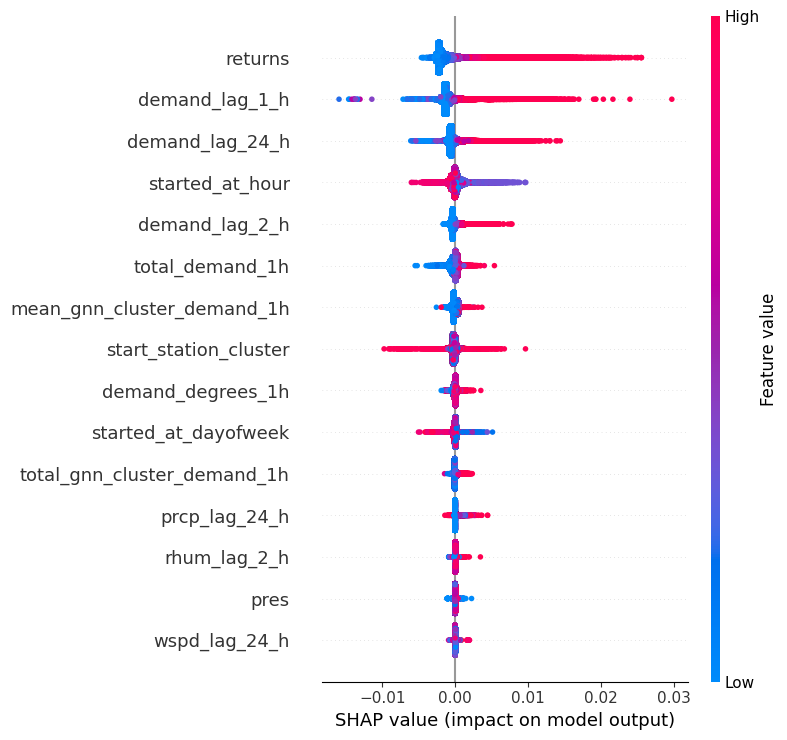

In [46]:
indexes = ~X_o['start_station_cluster'].isin(filtering_cluster)
X = X_o.loc[indexes]
shap_values = shap_values_o[X.index]
shap.summary_plot(shap_values, X.drop(columns=removed_cols), max_display=15)

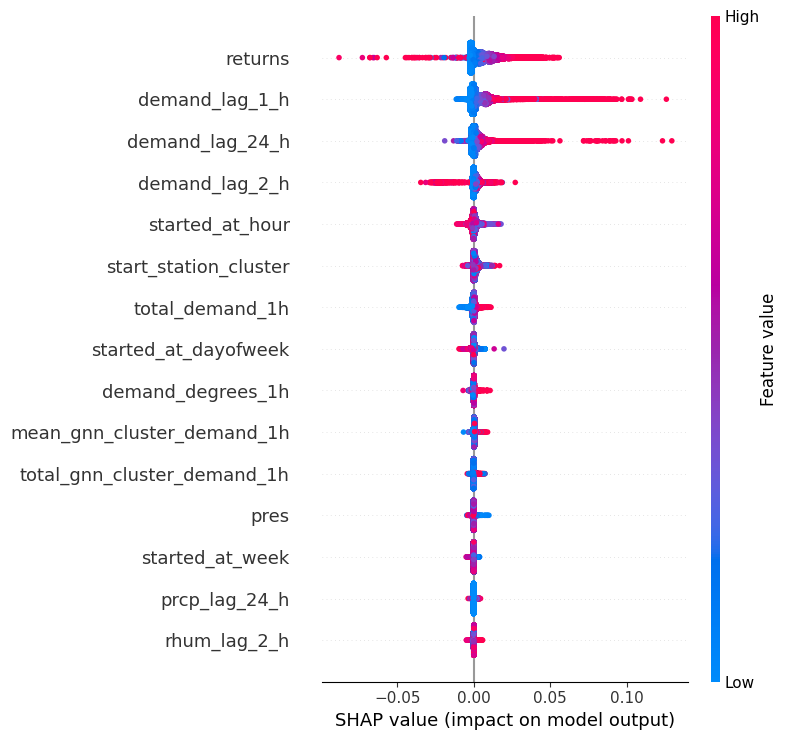

In [47]:
indexes = X_o['start_station_cluster'].isin(filtering_cluster)

X = X_o.loc[indexes]
shap_values = shap_values_o[X.index]
shap.summary_plot(shap_values, X.drop(columns=removed_cols), max_display=15)

In [48]:
X.columns

Index(['Unnamed: 0', 'start_station_cluster', 'started_at_month', 'started_at_day', 'started_at_hour', 'started_at_week', 'started_at_quarter', 'started_at_dayofweek', 'is_holiday', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco', 'demand_lag_1_h', 'demand_lag_2_h', 'demand_lag_24_h', 'temp_lag_1_h', 'temp_lag_2_h', 'temp_lag_24_h', 'prcp_lag_1_h', 'prcp_lag_2_h', 'prcp_lag_24_h', 'rhum_lag_1_h', 'rhum_lag_2_h', 'rhum_lag_24_h', 'wspd_lag_1_h', 'wspd_lag_2_h', 'wspd_lag_24_h', 'mean_gnn_cluster_demand_1h', 'total_gnn_cluster_demand_1h', 'total_demand_1h', 'demand_degrees_1h', 'returns', 'cosine_sim_pca_0', 'actual_demand', 'pred', 'started_at_year', 'coco_lag_1_h', 'coco_lag_2_h', 'coco_lag_24_h'], dtype='object')

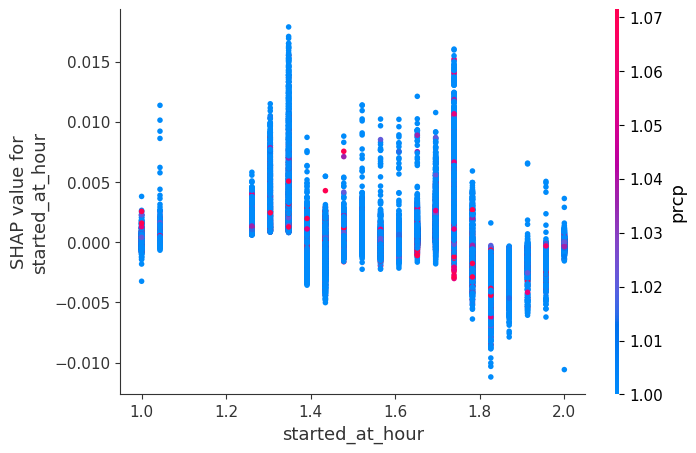

In [50]:
shap.dependence_plot("started_at_hour", shap_values, X.drop(columns=removed_cols), interaction_index="prcp")

In [51]:
data[data['start_station_cluster'].isin(filtering_cluster)]['actual_demand'].sum()

280915.0

In [52]:
data[~data['start_station_cluster'].isin(filtering_cluster)]['actual_demand'].sum()

262074.0

In [53]:
data['started_at_hourly']

0        2024-01-18 00:00:00
1        2024-01-18 01:00:00
2        2024-01-18 06:00:00
3        2024-01-18 07:00:00
4        2024-01-18 08:00:00
                 ...        
282275   2024-03-31 19:00:00
282276   2024-03-31 20:00:00
282277   2024-03-31 21:00:00
282278   2024-03-31 22:00:00
282279   2024-03-31 23:00:00
Name: started_at_hourly, Length: 282280, dtype: datetime64[ns]

In [54]:
demand_hourly_overall = data_combined.groupby('started_at_hourly')[
    ['actual_demand', 'pred']
    ].sum().reset_index().rename(
        columns = {
            "actual_demand": "Demand",
            "pred": "Prediction",
        }
)

In [55]:
print("RMSE Over The Network: ", np.sqrt(mean_squared_error(demand_hourly_overall['Demand'], demand_hourly_overall['Prediction'])))

RMSE Over The Network:  35.8318315145239


In [56]:
demand_hourly_overall = data_combined[data_combined['start_station_cluster'] == 100].groupby('started_at_hourly')[
    ['actual_demand', 'pred']
    ].sum().reset_index().rename(
        columns = {
            "actual_demand": "Demand",
            "pred": "Prediction",
        }
)
pred_vs_demand(demand_hourly_overall, "Demand vs Predictions Stations 42")

In [57]:
demand_hourly_overall = data_combined[data_combined['start_station_cluster'].isin(filtering_cluster)].groupby('started_at_hourly')[
    ['actual_demand', 'pred']
    ].sum().reset_index().rename(
        columns = {
            "actual_demand": "Demand",
            "pred": "Prediction",
        }
)
pred_vs_demand(demand_hourly_overall, "Test")

In [58]:
demand_daily_overall = data_combined[~data_combined['start_station_cluster'].isin(filtering_cluster)].groupby('started_at_daily')[
    ['actual_demand', 'pred']
    ].sum().reset_index().rename(
        columns = {
            "actual_demand": "Demand",
            "pred": "Prediction",
        }
)

pred_vs_demand(demand_daily_overall, "Test", 'started_at_daily', start_date="2024-1-1", end_date="2024-3-30")

In [59]:
full_data = pd.read_csv(f"{data_dir}/df_final_dataframe.csv").drop(columns=['Unnamed: 0'])

In [60]:
full_data_2024 = full_data[pd.to_datetime(full_data['started_at'])>=pd.to_datetime("2024-01-01")]
agg = full_data_2024.groupby(['start_station_cluster', 'start_station_id'])['ride_id'].count()
agg = agg.reset_index().rename(
    columns = {'ride_id': "actual_demand"}
)

In [61]:
standard_stations = pd.read_csv(f"{data_dir}/standard_stations.csv").drop(columns=['Unnamed: 0'])
standard_stations = standard_stations.merge(agg, how="left", left_on=['cluster_stations', 'station_id'], right_on=['start_station_cluster', 'start_station_id']).dropna()

standard_stations_2 = pd.read_csv(f"{data_dir}/standard_stations.csv").drop(columns=['Unnamed: 0'])
agg = data.groupby("start_station_cluster_original")['actual_demand'].sum().reset_index()
standard_stations_prepped = standard_stations_2.merge(agg, how="left", left_on='cluster_stations', right_on='start_station_cluster_original').dropna()

In [62]:
data['start_station_cluster_original'].nunique()

163

In [63]:
standard_stations_2.query("clusters==1").shape

(376, 7)

In [64]:
standard_stations_2.query("clusters==1")['cluster_stations'].nunique()

183

In [65]:
standard_stations.shape

(565, 10)

In [66]:
standard_stations.query("clusters==1").shape

(353, 10)

In [67]:
standard_stations

station_id  station_latitude  station_longitude  clusters  cluster_stations  station_latitude_centroid_stations  station_longitude_centroid_stations  start_station_cluster start_station_id  actual_demand
0     SJ-M11-1         37.306075        -121.857710         0                 0                           37.306075                          -121.857710                    0.0         SJ-M11-1          206.0
1        SJ-Q4         37.308889        -121.899986         0                 1                           37.308889                          -121.899986                    1.0            SJ-Q4           38.0
2        SJ-Q5         37.311145        -121.896271         0                 2                           37.311145                          -121.896271                    2.0            SJ-Q5            9.0
3        SJ-P6         37.315002        -121.897765         0                 3                           37.315002                          -121.897765                    3.0            SJ-P6            6.0
4        SJ-O4         37.316623        -121.909885         0                 4                           37.316623                          -121.909885                    4.0            SJ-O4           33.0
..         ...               ...                ...       ...               ...                                 ...                                  ...                    ...              ...            ...
589      BK-C5         37.873558        -122.283093         2               369                           37.873558                          -122.283093                  369.0            BK-C5          337.0
590      BK-C7         37.873676        -122.268487         2               368                           37.873016                          -122.267467                  368.0            BK-C7          198.0
591      BK-C9         37.875321        -122.260155         2               370                           37.875321                          -122.260155                  370.0            BK-C9          436.0
592      BK-B7         37.876573        -122.269528         2               371                           37.876573                          -122.269528                  371.0            BK-B7          161.0
593      BK-A7         37.880208        -122.269789         2               372                           37.880208                          -122.269789                  372.0            BK-A7          338.0

[565 rows x 10 columns]

In [68]:
standard_stations_prepped['station_id'].value_counts()

station_id
SF-DD10                               1
SF-L28                                1
SF-K27-2                              1
SF-C22                                1
GGP-L1.7                              1
SF-Outside Lands-Temp                 1
OutsideTempStation                    1
SF-GGP-05                             1
SF-F18                                1
SF-J22-2                              1
SF-K27-3                              1
SF-J24                                1
Lab - NYC - Monolith                  1
SF-K24-3                              1
LYFT-SF01                             1
GGP-L1.5                              1
SF-GGP-03                             1
SF-J19                                1
SF-E29-2                              1
SF-B14                                1
SF-J26                                1
SF-F29                                1
SF-J28-2                              1
SF-K15-2                              1
SF-H18                                1
SF-J25                                1
SF-I19                                1
SF-G29-2                              1
SF-J13                                1
SF-G23                                1
SF-F23                                1
SF-C25                                1
SF-J15                                1
SF-K22-2                              1
SF-L29                                1
SF-K23                                1
SF-I23-1                              1
SF-K30-2                              1
SF-H16                                1
SF-F30-2                              1
SF-K26                                1
SF-L27-2                              1
OK-H9-1                               1
SF-J26-2                              1
SF-A20                                1
SF-G27                                1
SF-L30-1                              1
SF-N22-1A                             1
SF-B21                                1
SF-D27                                1
SF-F30-1                              1
SF-K17-2                              1
SF-N20-1                              1
SF-M30                                1
SF-N27                                1
SF-L27                                1
SF-M11                                1
SF-M15                                1
SF-M28                                1
SF-F30-3                              1
SF-J23-1                              1
SF-N29                                1
SF-M12                                1
SF-M8                                 1
SF-M22-1                              1
SF-C21                                1
L1.1                                  1
SF-I16                                1
SF-L24                                1
SF-A25                                1
SF-M26-2                              1
L1.11                                 1
SF-J23-2                              1
SF-H13                                1
SF-J29-1                              1
SF-M27                                1
SF-M24                                1
SF-A22                                1
SF-M25                                1
SF-K24                                1
SF-M26                                1
SF-L31-1                              1
SF-F26-2                              1
SF-L20                                1
SF-M13                                1
SF-M22-2                              1
SF-F27                                1
SF-K25                                1
SF-J12                                1
SF-G28-1                              1
SF-E28                                1
SF-C18                                1
SF-G25                                1
SF-F19                                1
SF-G28-2                              1
SF-G26                                1
SF-F16                                1
SF-F9                                 1
SF-G17                                1
SF-F15                       

In [69]:
standard_stations_prepped.shape


(351, 9)

# Exploratory Analysis

## Barchart for number of stations

In [70]:
import plotly.express as px
stations = standard_stations_2.query("clusters==1").groupby("cluster_stations")['station_id'].count().sort_values().value_counts().reset_index().rename(columns={'station_id': "number_of_stations"})
stations['number_of_stations'] = stations['number_of_stations'].astype(str)
fig = px.bar(stations, x='number_of_stations', y='count', text_auto=True, width=800, height=400)
fig.show()

In [71]:
standard_stations['cluster_stations'] = standard_stations['cluster_stations'].astype(int)

## Map Demand Distribution

### Per Station

In [72]:
all_data_diffq = (standard_stations["actual_demand"].max() - standard_stations["actual_demand"].min()) / 13
standard_stations["actual_demand_scaled"] = (standard_stations["actual_demand"] - standard_stations["actual_demand"].min()) / all_data_diffq + 1
stations_distribution = standard_stations.query("clusters == 1")
fig = px.scatter_mapbox(stations_distribution, lat='station_latitude', lon='station_longitude',
                        color = "cluster_stations",
                        mapbox_style="open-street-map",
                        hover_name="station_id",
                        size_max  = 20,
                        size ='actual_demand_scaled',
                        color_continuous_scale=["red",
                                         "green", "blue",
                                         "purple"], width=800, height=625
                       )

fig.update_geos(fitbounds="locations")
fig.show()

### Per Cluster

In [73]:
all_data_diffq = (standard_stations_prepped["actual_demand"].max() - standard_stations_prepped["actual_demand"].min()) / 13
stations_distribution = standard_stations_prepped.query("clusters == 1")
standard_stations_prepped["actual_demand_scaled"] = (standard_stations_prepped["actual_demand"] - standard_stations_prepped["actual_demand"].min()) / all_data_diffq + 1
standard_stations_prepped["actual_demand_scaled"] = (standard_stations_prepped["actual_demand"] - standard_stations_prepped["actual_demand"].min()) / all_data_diffq + 1

fig = px.scatter_mapbox(standard_stations_prepped, lat='station_latitude_centroid_stations', lon='station_longitude_centroid_stations',
                        color = "cluster_stations",
                        mapbox_style="open-street-map",
                        hover_name="cluster_stations",
                        size_max  = 20,
                        size ='actual_demand_scaled',
                        color_continuous_scale=[
                            "red",
                            "green",
                            "blue",
                            "purple"], width=800, height=625
                       )

fig.update_geos(fitbounds="locations")
fig.show()

### Worst Stations

In [137]:
all_data_diffq = (standard_stations["actual_demand"].max() - standard_stations["actual_demand"].min()) / 13
standard_stations["actual_demand_scaled"] = (standard_stations["actual_demand"] - standard_stations["actual_demand"].min()) / all_data_diffq + 1
stations_distribution = standard_stations.query("clusters == 1")
stations_distribution['Is worst'] = stations_distribution['cluster_stations'].isin(filtering_cluster)
fig = px.scatter_mapbox(stations_distribution, lat='station_latitude', lon='station_longitude',
                        color = "Is worst",
                        mapbox_style="open-street-map",
                        hover_name="station_id",
                        size_max  = 20,
                        size ='actual_demand_scaled',
                        color_continuous_scale=["red",
                                         "green", "blue",
                                         "purple"], width=800, height=625,
                          zoom=11.2
                       )#.update_traces(marker={"size": 10})

fig.update_geos(fitbounds="locations")
fig.show()

<ipython-input-137-c4f766ad6b63>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
print(stations_distribution.query('`Is worst`==True')['actual_demand'].sum())
stations_distribution.query('`Is worst`==True')

12439.0


station_id  station_latitude  station_longitude  clusters  cluster_stations  station_latitude_centroid_stations  station_longitude_centroid_stations  start_station_cluster start_station_id  actual_demand  actual_demand_scaled  Is_worst
91     SF-AA20         37.720080        -122.425294         1                79                           37.720080                          -122.425294                   79.0          SF-AA20           50.0              1.077700      True
93       SF-Z7         37.720872        -122.478613         1                81                           37.720872                          -122.478613                   81.0            SF-Z7          157.0              1.262452      True
99      Sf-Z17         37.723247        -122.437725         1                86                           37.723247                          -122.437725                   86.0           Sf-Z17          100.0              1.164032      True
101      SF-Y7         37.723394        -122.480241         1                88                           37.723394                          -122.480241                   88.0            SF-Y7           52.0              1.081153      True
105      SF-Y8         37.725488        -122.476622         1                91                           37.725488                          -122.476622                   91.0            SF-Y8           94.0              1.153672      True
108     SF-Y18         37.727118        -122.435600         1                94                           37.727118                          -122.435600                   94.0           SF-Y18           93.0              1.151946      True
113     SF-X19         37.729831        -122.433079         1                99                           37.729831                          -122.433079                   99.0           SF-X19          135.0              1.224465      True
116      SF-W8         37.730754        -122.476084         1               102                           37.731443                          -122.474104                  102.0            SF-W8          231.0              1.390224      True
118    SF-LW29         37.731600        -122.473299         1               102                           37.731443                          -122.474104                  102.0          SF-LW29           52.0              1.081153      True
122     SF-I25         37.731802        -122.473714         1               102                           37.731443                          -122.474104                  102.0           SF-I25         3198.0              6.513216      True
124     SF-W19         37.732418        -122.433783         1               105                           37.732418                          -122.433783                  105.0           SF-W19          571.0              1.977288      True
165     SF-O12         37.743444        -122.471283         1               122                           37.743444                          -122.471283                  122.0           SF-O12          370.0              1.630230      True
215     SF-P26         37.753856        -122.400606         1               145                           37.753856                          -122.400606                  145.0           SF-P26         1502.0              3.584805      True
244      SF-M1         37.760000        -122.510000         1               154                           37.760273                          -122.509490                  154.0            SF-M1         1752.0              4.016470      True
250     SF-J10         37.760365        -122.508968         1               154                           37.760273                          -122.509490                  154.0           SF-J10         1186.0              3.039182      True
252     SF-K18         37.760452        -122.509502         1               154                           37.760273                          -122.509490            

In [136]:
print(stations_distribution.query('`Is worst`==False')['actual_demand'].sum())
stations_distribution.query('`Is worst`==False')

548784.0


station_id  station_latitude  station_longitude  clusters  cluster_stations  station_latitude_centroid_stations  station_longitude_centroid_stations  start_station_cluster       start_station_id  actual_demand  actual_demand_scaled  Is_worst
85                 SF-DD10         37.707671        -122.467997         1                74                           37.707671                          -122.467997                   74.0                SF-DD10           23.0              1.031080     False
86                 SF-CC18         37.713080        -122.433359         1                75                           37.713080                          -122.433359                   75.0                SF-CC18           60.0              1.094966     False
87                 SF-BB17         37.715657        -122.438987         1                76                           37.715657                          -122.438987                   76.0                SF-BB17           80.0              1.129499     False
88                SF-K30-3         37.715815        -122.441940         1                77                           37.715815                          -122.441940                   77.0               SF-K30-3         3159.0              6.445876     False
89                 SF-AA18         37.719912        -122.433841         1                78                           37.719994                          -122.434966                   78.0                SF-AA18          109.0              1.179572     False
90                 SF-AA15         37.720075        -122.436091         1                78                           37.719994                          -122.434966                   78.0                SF-AA15          189.0              1.317705     False
92               SF-AA15-2         37.720435        -122.447582         1                80                           37.720435                          -122.447582                   80.0              SF-AA15-2          125.0              1.207199     False
94                   SF-Z6         37.721965        -122.482774         1                82                           37.721965                          -122.482774                   82.0                  SF-Z6          126.0              1.208925     False
95                  SF-Z16         37.722341        -122.443755         1                83                           37.722764                          -122.444266                   83.0                 SF-Z16           50.0              1.077700     False
96                 SF-AA28         37.722381        -122.392764         1                84                           37.722381                          -122.392764                   84.0                SF-AA28           25.0              1.034533     False
97                  SF-Y16         37.723187        -122.444778         1                83                           37.722764                          -122.444266                   83.0                 SF-Y16           61.0              1.096693     False
98                  SF-Z13         37.723204        -122.455441         1                85                           37.723204                          -122.455441                   85.0                 SF-Z13          243.0              1.410944     False
100                 SF-Z28         37.723379        -122.389091         1                87                           37.723379                          -122.389091                   87.0                 SF-Z28           82.0              1.132953     False
102                SF-LW11         37.724301        -122.458001         1                89                           37.724301                          -122.458001                   89.0                SF-LW11           18.0              1.022447     False
103               SF-LW210         37.724486        -122.461235         1                90                           37.724777                   

## Demand per weekdays

In [74]:
weekday_count = full_data.groupby(['started_at_dayofweek'])['ride_id'].nunique().reset_index().rename(columns={
    "ride_id": "count",
    "started_at_dayofweek": "Week day"
})

weekday_count['Week day'] = weekday_count['Week day'].replace(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
})
fig = px.pie(weekday_count, values='count', names='Week day', width=900, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [75]:
# weekday_count = full_data_2024.groupby(['started_at_hourly'])['ride_id'].count().reset_index().rename(columns={
#     "ride_id": "count"
# })
# weekday_count['started_at_hourly'] = pd.to_datetime(weekday_count['started_at_hourly'])
# weekday_count['started_at_dayofweek'] = weekday_count['started_at_hourly'].dt.weekday

# weekday_count = weekday_count.groupby(['started_at_dayofweek'])['count'].mean().reset_index().rename(columns={

#     "started_at_dayofweek": "Week day"
# })

# weekday_count['Week day'] = weekday_count['Week day'].replace(
#     {
#         0: "Monday",
#         1: "Tuesday",
#         2: "Wednesday",
#         3: "Thursday",
#         4: "Friday",
#         5: "Saturday",
#         6: "Sunday",
# })
# fig = px.pie(weekday_count, values='count', names='Week day', width=900, height=500)
# fig.update_traces(textposition='inside')#, textinfo='percent+label')
# fig.show()

## Demand per month

In [76]:
agg_demand_overall = full_data.groupby(
    by=["started_at_year",
        "started_at_month", "started_at_day",
        "started_at_hour"]).agg({
    "ride_id": "count",
    "duration_sec": "mean",
})
start_time_date_details = full_data.drop_duplicates([
    'started_at_year', 'started_at_month', 'started_at_day'])
demand_hourly_overall = agg_demand_overall.reset_index().merge(start_time_date_details[[
    'started_at_week',
    'started_at_day',
    'started_at_quarter',
    'started_at_dayofweek',
    'started_at_year',
    'started_at_month'
]], on=['started_at_year', 'started_at_month', 'started_at_day']).rename(columns={
    'ride_id': "demand"
})

demand_hourly_overall = add_datetime(demand_hourly_overall)

demand_hourly_overall['Date'] = demand_hourly_overall['started_at_daily']
demand_hourly_overall['Day Of Year'] = demand_hourly_overall['started_at_daily'].dt.dayofyear

In [77]:
month_count = demand_hourly_overall.groupby(['started_at_month'])['demand'].mean().reset_index().rename(columns={
    "started_at_month": "Month"
})

fig = px.bar(month_count, x='Month', y='demand', width=800, height=400)
fig.show()

In [78]:
sorted_df = demand_hourly_overall.groupby("Date")['demand'].sum().reset_index()
fig = px.line(sorted_df, x="Date", y="demand", title=f'Demand Over Year')
fig.update_layout(hovermode="x")
fig.show()


In [79]:
sorted_df = demand_hourly_overall.groupby("Day Of Year")['demand'].mean().reset_index()
fig = px.line(sorted_df, x="Day Of Year", y="demand", title=f'Demand Over Year Per Day')
fig.update_layout(hovermode="x")
fig.show()


## Demand Per Hour


In [80]:
sorted_df

Day Of Year      demand
0              1  158.805556
1              2  108.250000
2              3  170.527778
3              4  145.375000
4              5  171.041667
5              6  168.791667
6              7  145.097222
7              8  198.666667
8              9  184.777778
9             10  177.027778
10            11  201.430556
11            12  238.611111
12            13  135.416667
13            14  177.986111
14            15  168.708333
15            16  181.388889
16            17  252.444444
17            18  249.972222
18            19  214.569444
19            20  191.250000
20            21  209.388889
21            22  218.180556
22            23  251.944444
23            24  227.916667
24            25  286.361111
25            26  260.375000
26            27  254.819444
27            28  248.750000
28            29  241.027778
29            30  265.541667
30            31  197.333333
31            32  236.111111
32            33  253.944444
33            34  212.180556
34            35  145.166667
35            36  214.000000
36            37  257.375000
37            38  232.152778
38            39  277.583333
39            40  274.500000
40            41  270.986111
41            42  246.361111
42            43  267.041667
43            44  267.555556
44            45  222.680556
45            46  276.777778
46            47  277.805556
47            48  214.486111
48            49  226.208333
49            50  219.500000
50            51  207.888889
51            52  248.097222
52            53  262.986111
53            54  251.152778
54            55  263.180556
55            56  240.041667
56            57  208.458333
57            58  241.472222
58            59  239.097222
59            60  256.236111
60            61  233.277778
61            62  204.125000
62            63  183.097222
63            64  237.388889
64            65  245.902778
65            66  270.638889
66            67  311.486111
67            68  241.375000
68            69  265.472222
69            70  226.816901
70            71  223.366197
71            72  247.070423
72            73  251.791667
73            74  308.208333
74            75  328.583333
75            76  308.041667
76            77  279.638889
77            78  208.527778
78            79  290.375000
79            80  245.805556
80            81  325.625000
81            82  269.652778
82            83  272.194444
83            84  256.208333
84            85  268.250000
85            86  267.180556
86            87  224.625000
87            88  265.555556
88            89  226.513889
89            90  283.958333
90            91  273.555556
91            92  248.666667
92            93  226.145833
93            94  256.270833
94            95  278.083333
95            96  294.708333
96            97  284.291667
97            98  299.375000
98            99  302.979167
99           100  253.708333
100          101  233.395833
101          102  281.958333
102          103  284.500000
103          104  205.812500
104          105  252.291667
105          106  221.104167
106          107  222.729167
107          108  260.875000
108          109  285.354167
109          110  320.937500
110          111  289.145833
111          112  295.291667
112          113  270.812500
113          114  255.500000
114          115  280.416667
115          116  313.500000
116          117  334.625000
117          118  293.125000
118          119  284.083333
119          120  252.208333
120          121  242.437500
121          122  226.270833
122          123  249.562500
123          124  295.250000
124          125  289.916667
125          126  266.229167
126          127  274.583333
127          128  223.020833
128          129  275.541667
129          130  291.854167
130          131  292.458333
131          132  287.812500
132          133  287.645833
133          134  272.500000
134          135  301.875000
135          136  276.541667
136          137  298.229167
137

In [81]:
px.colors.sequential.Burg

['rgb(255, 198, 196)',
 'rgb(244, 163, 168)',
 'rgb(227, 129, 145)',
 'rgb(204, 96, 125)',
 'rgb(173, 70, 108)',
 'rgb(139, 48, 88)',
 'rgb(103, 32, 68)']

In [82]:
demand_hourly_overall['Day of The Week'] = demand_hourly_overall['started_at_dayofweek'].replace(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
})

demand_hourly_overall['Hours'] = demand_hourly_overall['started_at_hour']

sorted_df = demand_hourly_overall.groupby(["Hours", "Day of The Week"])['demand'].mean().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_df["Day of The Week"] = pd.Categorical(sorted_df["Day of The Week"], categories=day_order, ordered=True)
sorted_df = sorted_df.sort_values(["Day of The Week", 'Hours'])
fig = px.line(sorted_df, x="Hours", y="demand", title=f'Hourly Demand Overall', markers=True,
              color='Day of The Week', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(hovermode="x",
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    ),)
fig.show()


In [83]:
def day_to_season(day_of_year):
    if day_of_year in range(1, 60) or day_of_year >= 335:  # Jan 1 - Feb 29, Dec
        return "Winter"
    elif day_of_year in range(60, 152):  # Mar 1 - May 31
        return "Spring"
    elif day_of_year in range(152, 244):  # Jun 1 - Aug 31
        return "Summer"
    elif day_of_year in range(244, 335):  # Sep 1 - Nov 30
        return "Fall"

In [84]:
demand_hourly_overall['Season'] = demand_hourly_overall['Day Of Year'].apply(day_to_season)

In [85]:
sorted_df = demand_hourly_overall.groupby(["Hours", "Season"])['demand'].mean().reset_index()
season_order = ["Winter", "Spring", "Summer", "Fall"]
sorted_df["Season"] = pd.Categorical(sorted_df["Season"], categories=season_order, ordered=True)
sorted_df = sorted_df.sort_values(["Season", 'Hours'])

fig = px.line(sorted_df, x="Hours", y="demand", title=f'Hourly Demand Overall', markers=True,
              color='Season', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(hovermode="x",
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    ),)
fig.show()

## Weather condition correlation

In [86]:
weather_data = pd.read_csv(f"{data_dir}/weather_data.csv")
weather_data['started_at_hourly'] = pd.to_datetime(weather_data['started_at_hourly'])
full_data['started_at_hourly'] = pd.to_datetime(full_data['started_at_hourly'])

median_code = weather_data["coco"].median()

weather_data["coco"] = weather_data["coco"].fillna(median_code).astype(int)

weather_data['coco_codes'] = weather_data['coco'].replace({
    1: "Clear",
    2: "Fair",
    3: "Cloudy",
    4: "Overcast",
    5: "Fog",
    6: "Freezing Fog",
    7: "Light Rain",
    8: "Rain",
    9: "Heavy Rain",
    10: "Freezing Rain",
    11: "Heavy Freezing Rain",
    12: "Sleet",
    13: "Heavy Sleet",
    14: "Light Snowfall",
    15: "Snowfall",
    16: "Heavy Snowfall",
    17: "Rain Shower",
    18: "Heavy Rain Shower",
    19: "Sleet Shower",
    20: "Heavy Sleet Shower",
    21: "Snow Shower",
    22: "Heavy Snow Shower",
    23: "Lightning",
    24: "Hail",
    25: "Thunderstorm",
    26: "Heavy Thunderstorm",
    27: "Storm"
})

number_of_clusters = full_data['start_station_cluster'].nunique()

weather_data_time = weather_data.reset_index().rename(columns={
    "time": "started_at_hourly"
})
full_data['clusters'] = 1

full_data_weather = full_data.merge(weather_data_time[['temp', 'dwpt', "rhum", "prcp", "wdir", "wspd", "pres", "coco", "centroid", 'started_at_hourly', 'coco_codes']].rename(columns={
    "centroid":"clusters"
}), on=['clusters', "started_at_hourly"], how='left')

In [87]:
demand_hourly_overall['clusters'] = 1
demand_hourly_overall_weather = demand_hourly_overall.merge(weather_data_time[['temp', 'dwpt', "rhum", "prcp", "wdir", "wspd", "pres", "coco", "centroid", 'started_at_hourly', 'coco_codes']].rename(columns={
    "centroid":"clusters"
}), on=['clusters', "started_at_hourly"], how='left')

In [88]:
#demand_hourly_overall_weather['Temp Bin']

In [89]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
df = demand_hourly_overall_weather.copy()
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['demand'], mode='lines', name='Demand'))
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['temp'], mode='lines', name='Temperature', yaxis='y2'))

# Add dual y-axes
fig.update_layout(
    yaxis=dict(title="Demand"),
    yaxis2=dict(title="Temperature (°C)", overlaying="y", side="right"),
    xaxis=dict(title="Time"),
    title="Demand vs. Temperature"
)

fig.show()

In [90]:

fig = px.scatter(
    df,
    x="temp",
    y="demand",
    title="Scatter Plot of Temperature vs Demand",
    labels={"temp": "Temperature (°C)", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

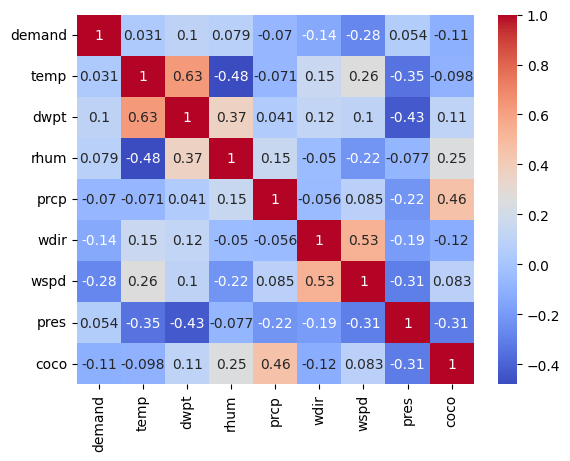

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[["demand", "temp", 'dwpt', "rhum", "prcp", "wdir", "wspd", "pres", "coco"]].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
#plt.title("Correlation Matrix: Temperature vs Demand")
plt.show()

In [92]:

# Create traces
fig = go.Figure()
df = demand_hourly_overall_weather.copy()
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['demand'], mode='lines', name='Demand'))
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['prcp'], mode='lines', name='Precipitation ', yaxis='y2'))

# Add dual y-axes
fig.update_layout(
    yaxis=dict(title="Demand"),
    yaxis2=dict(title="Precipitation mm", overlaying="y", side="right"),
    xaxis=dict(title="Time"),
    title="Demand vs. Precipitation"
)

fig.show()

In [93]:

fig = px.scatter(
    df,
    x="pres",
    y="demand",
    title="Scatter Plot of Precipitation vs Demand",
    labels={"prcp": "Precipitation (mm)", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

In [94]:

fig = px.scatter(
    df,
    x="prcp",
    y="demand",
    title="Scatter Plot of Precipitation vs Demand",
    labels={"prcp": "Precipitation (mm)", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

In [95]:

# Create traces
fig = go.Figure()
df = demand_hourly_overall_weather.copy()
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['demand'], mode='lines', name='Demand'))
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['wdir'], mode='lines', name='wdir ', yaxis='y2'))

# Add dual y-axes
fig.update_layout(
    yaxis=dict(title="Demand"),
    yaxis2=dict(title="Precipitation mm", overlaying="y", side="right"),
    xaxis=dict(title="Time"),
    title="Demand vs. Humidity"
)

fig.show()

In [96]:

fig = px.scatter(
    df,
    x="wdir",
    y="demand",
    title="Scatter Plot of Wind Direction vs Demand",
    labels={"wdir": "Wind Direction", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

In [97]:

fig = px.scatter(
    df,
    x="wspd",
    y="demand",
    title="Scatter Plot of Wind Speed vs Demand",
    labels={"wspd": "Wind speed (km/h)", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

In [98]:

# Create traces
fig = go.Figure()
df = demand_hourly_overall_weather.copy()
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['demand'], mode='lines', name='Demand'))
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['wspd'], mode='lines', name='Wind Speed ', yaxis='y2'))

# Add dual y-axes
fig.update_layout(
    yaxis=dict(title="Demand"),
    yaxis2=dict(title="Precipitation mm", overlaying="y", side="right"),
    xaxis=dict(title="Time"),
    title="Demand vs. Humidity"
)

fig.show()

In [99]:

fig = px.scatter(
    df,
    x="rhum",
    y="demand",
    title="Scatter Plot of Humidity vs Demand",
    labels={"rhum": "Humidity (%)", "demand": "Demand"},
    #trendline="ols"  # Adds a linear regression trendline
)
fig.show()

In [100]:
df['coco'].value_counts()

coco
2     9455
3     5913
1     1417
4     1108
7      793
8      465
5      322
9      220
18       8
Name: count, dtype: int64

In [101]:
df['coco'].value_counts()

coco
2     9455
3     5913
1     1417
4     1108
7      793
8      465
5      322
9      220
18       8
Name: count, dtype: int64

In [102]:

# Create traces
fig = go.Figure()
df = demand_hourly_overall_weather.copy()
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['demand'], mode='lines', name='Demand'))
fig.add_trace(go.Scatter(x=df['started_at_hourly'], y=df['coco'], mode='lines', name='Humidity', yaxis='y2'))

# Add dual y-axes
fig.update_layout(
    yaxis=dict(title="Demand"),
    yaxis2=dict(title="Humidity %", overlaying="y", side="right"),
    xaxis=dict(title="Time"),
    title="Demand vs. Humidity"
)

fig.show()

In [103]:
df.sort_values("coco")

started_at_year  started_at_month  started_at_day  started_at_hour  demand  duration_sec  started_at_week  started_at_quarter  started_at_dayofweek   started_at_hourly started_at_daily       Date  Day Of Year Day of The Week  Hours  Season  clusters  temp  dwpt  rhum  prcp   wdir  wspd    pres  coco         coco_codes
9850              2023                 2              15               11     285    812.849123                7                   1                     2 2023-02-15 11:00:00       2023-02-15 2023-02-15           46       Wednesday     11  Winter         1  10.0  -0.5  48.0   0.0  360.0  31.7  1021.6     1              Clear
2295              2022                 4               6               16     578    850.603806               14                   2                     2 2022-04-06 16:00:00       2022-04-06 2022-04-06           96       Wednesday     16  Spring         1  15.6   8.8  64.0   0.0   40.0   5.4  1021.0     1              Clear
2294              2022                 4               6               15     404    912.591584               14                   2                     2 2022-04-06 15:00:00       2022-04-06 2022-04-06           96       Wednesday     15  Spring         1  12.8   6.6  66.0   0.0    0.0   0.0  1020.7     1              Clear
2293              2022                 4               6               14     340   1168.291176               14                   2                     2 2022-04-06 14:00:00       2022-04-06 2022-04-06           96       Wednesday     14  Spring         1  11.1   5.6  69.0   0.0  250.0   5.4  1020.2     1              Clear
2292              2022                 4               6               13     357   1079.215686               14                   2                     2 2022-04-06 13:00:00       2022-04-06 2022-04-06           96       Wednesday     13  Spring         1  10.0   4.4  68.0   0.0    0.0   0.0  1020.0     1              Clear
...                ...               ...             ...              ...     ...           ...              ...                 ...                   ...                 ...              ...        ...          ...             ...    ...     ...       ...   ...   ...   ...   ...    ...   ...     ...   ...                ...
3095              2022                 5              10                0      38    726.605263               19                   2                     1 2022-05-10 00:00:00       2022-05-10 2022-05-10          130         Tuesday      0  Spring         1  14.4   1.6  42.0   0.0  280.0  33.5  1017.8    18  Heavy Rain Shower
18080             2024                 1              24               10     240    592.279167                4                   1                     2 2024-01-24 10:00:00       2024-01-24 2024-01-24           24       Wednesday     10  Winter         1  11.7   9.9  89.0   0.3  150.0   9.4  1019.1    18  Heavy Rain Shower
18333             2024                 2               3               23      19    712.105263                5                   1                     5 2024-02-03 23:00:00       2024-02-03 2024-02-03           34        Saturday     23  Winter         1  12.8   6.6  66.0   0.0   90.0  13.0  1012.8    18  Heavy Rain Shower
8158              2022                12               6               23      83   2098.686747               49                   4                     1 2022-12-06 23:00:00       2022-12-06 2022-12-06          340         Tuesday     23  Winter         1  12.8   8.3  74.0   0.0   10.0  14.8  1017.5    18  Heavy Rain Shower
6286              2022                 9              19               23      79    875.924051               38                   3                     0 2022-09-19 23:00:00       2022-09-19 2022-09-19          262          Monday     23    Fall         1  22.8  11.8  50.0   0.0  210.0  14.8  1008.8    18  Heavy Rain Shower

[19701 rows x 26 columns]

In [104]:
weather_demand = df.sort_values("coco").groupby("coco_codes")

In [105]:
df.sort_values("coco").groupby("coco_codes")['demand'].mean()

coco_codes
Clear                324.606210
Cloudy               278.970573
Fair                 265.509466
Fog                  311.540373
Heavy Rain           133.495455
Heavy Rain Shower    124.125000
Light Rain           187.881463
Overcast             282.099278
Rain                 158.329032
Name: demand, dtype: float64

In [106]:
df = demand_hourly_overall_weather.copy()
weather_demand = df.groupby(['coco', "coco_codes"])['demand'].mean().reset_index().sort_values("coco").rename(columns={
    "coco_codes": "Weather Codes",
    "demand": "Demand"
})

fig = px.bar(weather_demand, x='Weather Codes', y='Demand', width=700, height=400)
fig.show()#.#['coco_codes']#.value_counts()